# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


C:\Users\Omar\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv("Classified Data")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [6]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [9]:
tmp = pd.DataFrame(y_test)
tmp['TARGET CLASS'].value_counts()

0    250
1    250
Name: TARGET CLASS, dtype: int64

In [10]:
tmp2= pd.DataFrame(pred)
tmp2[0].value_counts()

0    258
1    242
Name: 0, dtype: int64

### Evaluation of classification quality using Confusion Matrix

In [11]:
# Importing the dependancies
from sklearn import metrics


confusionMatrix=metrics.confusion_matrix(y_test, pred)
confusionMatrix

array([[232,  18],
       [ 26, 224]], dtype=int64)

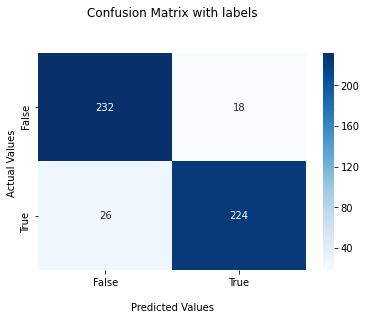

In [12]:
import seaborn as sns

ax = sns.heatmap(confusionMatrix,annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***Print Misclassification error rate***

In [13]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [14]:
print("error rate: ",1-metrics.accuracy_score(y_test, pred))

error rate:  0.08799999999999997


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [21]:
import matplotlib.pyplot as plt
error_array=[]
iterations=[]
for j in range(1,20):
    for k in range(1,300):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        error=1-metrics.accuracy_score(y_test, pred)
        error_array.append(error)
    iterations.append(error_array)
    error_array=[]
avg=np.average(iterations, axis=0)
Max=np.max(iterations,axis=0)
Min=np.min(iterations,axis=0)

avg


array([0.088, 0.098, 0.076, 0.082, 0.062, 0.062, 0.06 , 0.06 , 0.06 ,
       0.06 , 0.064, 0.058, 0.062, 0.056, 0.058, 0.058, 0.056, 0.056,
       0.054, 0.054, 0.05 , 0.048, 0.052, 0.05 , 0.054, 0.048, 0.05 ,
       0.048, 0.052, 0.048, 0.052, 0.048, 0.05 , 0.05 , 0.054, 0.052,
       0.05 , 0.048, 0.05 , 0.052, 0.052, 0.052, 0.052, 0.052, 0.052,
       0.05 , 0.052, 0.05 , 0.05 , 0.048, 0.05 , 0.046, 0.05 , 0.046,
       0.05 , 0.048, 0.05 , 0.05 , 0.05 , 0.048, 0.048, 0.048, 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.052, 0.052, 0.05 , 0.054,
       0.054, 0.054, 0.054, 0.052, 0.054, 0.052, 0.048, 0.05 , 0.048,
       0.05 , 0.048, 0.048, 0.046, 0.046, 0.046, 0.044, 0.044, 0.044,
       0.046, 0.044, 0.046, 0.044, 0.046, 0.046, 0.046, 0.044, 0.046,
       0.046, 0.046, 0.044, 0.046, 0.044, 0.044, 0.044, 0.044, 0.042,
       0.048, 0.046, 0.046, 0.046, 0.046, 0.046, 0.046, 0.046, 0.046,
       0.046, 0.046, 0.046, 0.046, 0.046, 0.046, 0.048, 0.046, 0.048,
       0.048, 0.048,

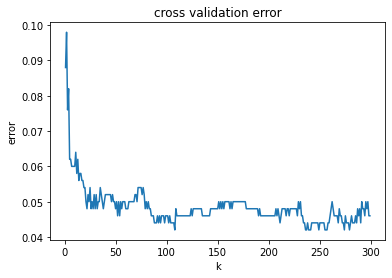

In [22]:

k= [i for i in range(1,300)]
plt.plot(k,avg)
plt.vlines(x=k, ymin=Min, ymax=Max,colors='blue',ls='--',lw=2)
plt.title("cross validation error")
plt.xlabel("k")
plt.ylabel("error")
plt.show()